In [1]:

# Cell 7: Define image generators for train, val, and test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
split_base_dir = "/home/hamza/Desktop/RMI DATA/flattened_jpg"
img_size = (224, 224)
batch_size = 32

# Data generators

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test



test_gen = test_datagen.flow_from_directory(
    split_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class indices to verify labels
print("\nClass indices:")
print(test_gen.class_indices)

2025-04-24 12:06:59.711871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745478419.840852    9136 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745478419.878319    9136 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 12:07:00.228111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 572 images belonging to 2 classes.

Class indices:
{'Benign': 0, 'Malignant': 1}


**Simple (Augmented)**

In [2]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/home/hamza/Desktop/final files/public_dataset_colab.h5'  
model = load_model(model_path)



I0000 00:00:1745478705.355815    9136 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4233 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# Evaluate
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


/home/hamza/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745478754.942214    9328 service.cc:148] XLA service 0x7ad8dc002c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745478754.943600    9328 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-24 12:12:35.020161: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745478755.733185    9328 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-04-24 12:12:36.829419: I 

 1/18 ━━━━━━━━━━━━━━━━━━━━ 3:50 14s/step - accuracy: 0.9062 - loss: 0.7835

I0000 00:00:1745478765.953583    9328 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7268 - loss: 1.2606

2025-04-24 12:12:49.033883: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1993_0', 8 bytes spill stores, 8 bytes spill loads

2025-04-24 12:12:49.563908: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1993', 164 bytes spill stores, 164 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 678ms/step - accuracy: 0.7022 - loss: 1.3424
Test Accuracy: 0.4930, Test Loss: 2.0375


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step
Classification Report:
              precision    recall  f1-score   support

      Benign       0.49      0.79      0.61       282
   Malignant       0.50      0.20      0.29       290

    accuracy                           0.49       572
   macro avg       0.50      0.50      0.45       572
weighted avg       0.50      0.49      0.45       572



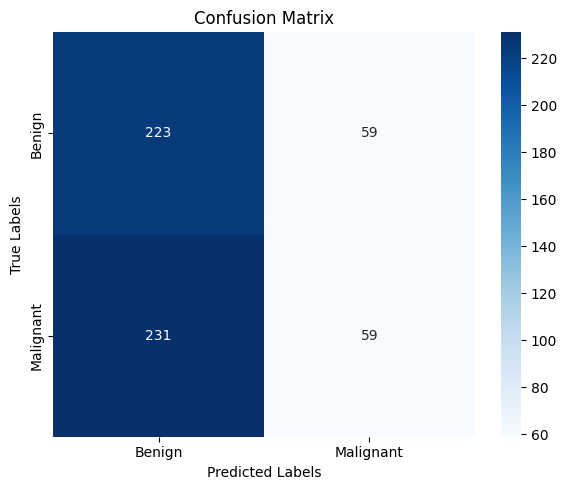

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the test set
Y_pred = model.predict(test_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_gen.classes

# Step 3: Class labels
class_labels = list(test_gen.class_indices.keys())

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


**Public dataset using reduced benign**

In [6]:
import tensorflow as tf
from tensorflow.keras.backend import clear_session

# Clear TensorFlow session and resources
clear_session()
tf.compat.v1.reset_default_graph()
print("TensorFlow session and resources cleared.")

TensorFlow session and resources cleared.


In [7]:

# Cell 7: Define image generators for train, val, and test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
split_base_dir = "/home/hamza/Desktop/RMI DATA/flattened_jpg"
img_size = (224, 224)
batch_size = 32

# Data generators

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test



test_gen = test_datagen.flow_from_directory(
    split_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class indices to verify labels
print("\nClass indices:")
print(test_gen.class_indices)

Found 572 images belonging to 2 classes.

Class indices:
{'Benign': 0, 'Malignant': 1}


In [8]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/home/hamza/Desktop/final files/public_dataset_colab_reduced_benign.h5'  
model = load_model(model_path)


In [9]:
# Evaluate
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


/home/hamza/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - accuracy: 0.6583 - loss: 6.1816
Test Accuracy: 0.5472, Test Loss: 6.5716


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step
Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.73      0.61       282
   Malignant       0.58      0.37      0.45       290

    accuracy                           0.55       572
   macro avg       0.56      0.55      0.53       572
weighted avg       0.56      0.55      0.53       572



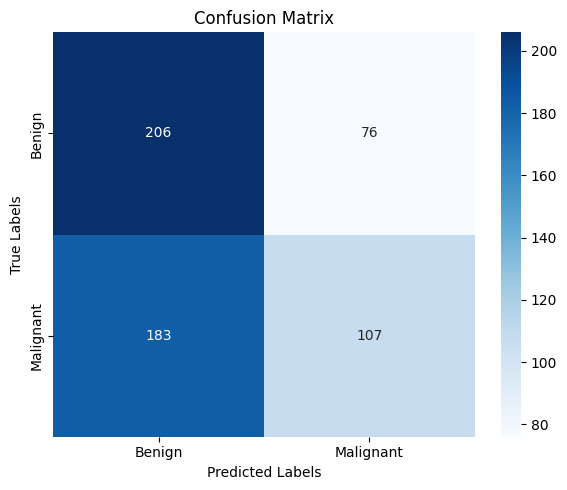

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the test set
Y_pred = model.predict(test_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_gen.classes

# Step 3: Class labels
class_labels = list(test_gen.class_indices.keys())

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


**Public dataset using class weights**

In [11]:
import tensorflow as tf
from tensorflow.keras.backend import clear_session

# Clear TensorFlow session and resources
clear_session()
tf.compat.v1.reset_default_graph()
print("TensorFlow session and resources cleared.")

TensorFlow session and resources cleared.


In [12]:

# Cell 7: Define image generators for train, val, and test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
split_base_dir = "/home/hamza/Desktop/RMI DATA/flattened_jpg"
img_size = (224, 224)
batch_size = 32

# Data generators

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test



test_gen = test_datagen.flow_from_directory(
    split_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class indices to verify labels
print("\nClass indices:")
print(test_gen.class_indices)

Found 572 images belonging to 2 classes.

Class indices:
{'Benign': 0, 'Malignant': 1}


In [13]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/home/hamza/Desktop/final files/public_dataset_colab_using_class_weights.h5'  
model = load_model(model_path)


In [14]:
# Evaluate
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


/home/hamza/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.6599 - loss: 3.0230
Test Accuracy: 0.5507, Test Loss: 3.4027


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step
Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.73      0.62       282
   Malignant       0.59      0.37      0.46       290

    accuracy                           0.55       572
   macro avg       0.56      0.55      0.54       572
weighted avg       0.56      0.55      0.54       572



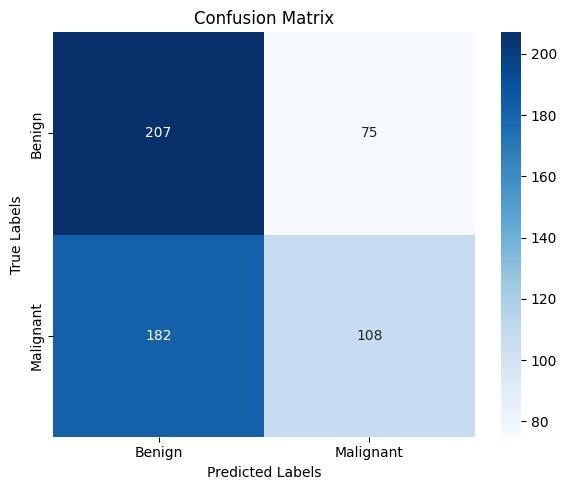

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the test set
Y_pred = model.predict(test_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_gen.classes

# Step 3: Class labels
class_labels = list(test_gen.class_indices.keys())

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/home/hamza/Desktop/final files/public_dataset_colab.h5'  
model = load_model(model_path)



2025-04-24 15:26:00.737832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745490360.751730   14702 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745490360.755643   14702 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 15:26:00.770283: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1745490363.062332   14702 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42

In [3]:
# Check the number of layers in the model
num_layers = len(model.layers)
print(f"The model has {num_layers} layers.")

The model has 315 layers.


In [10]:
import tensorflow as tf
from tensorflow.keras.backend import clear_session

# Clear TensorFlow session and resources
clear_session()
tf.compat.v1.reset_default_graph()
print("TensorFlow session and resources cleared.")

TensorFlow session and resources cleared.


In [11]:

# Cell 7: Define image generators for train, val, and test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
split_base_dir = "/home/hamza/Desktop/RMI DATA/flattened_jpg"
img_size = (512, 512)
batch_size = 32

# Data generators

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test



test_gen = test_datagen.flow_from_directory(
    split_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class indices to verify labels
print("\nClass indices:")
print(test_gen.class_indices)

Found 572 images belonging to 2 classes.

Class indices:
{'Benign': 0, 'Malignant': 1}


In [12]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/home/hamza/Downloads/my_model3.h5'  
model = load_model(model_path, compile=False)
from keras.models import Model
from keras.layers import Dense

# Get the output of the second-last layer
x = model.layers[-2].output  # Use -2 if -1 is the classification layer

# Add a new output layer for 2-class classification
new_output = Dense(2, activation='softmax')(x)

# Create a new model
model = Model(inputs=model.input, outputs=new_output)

from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Evaluate
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


/home/hamza/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-04-24 21:43:25.804876: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 532684800 exceeds 10% of free system memory.


 1/18 ━━━━━━━━━━━━━━━━━━━━ 15s 922ms/step - accuracy: 0.4062 - loss: 0.7572

2025-04-24 21:43:26.280045: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 532684800 exceeds 10% of free system memory.


 2/18 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.4375 - loss: 0.7521 

2025-04-24 21:43:26.734914: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 532684800 exceeds 10% of free system memory.


 3/18 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.4479 - loss: 0.7446

2025-04-24 21:43:27.194823: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 532684800 exceeds 10% of free system memory.


 4/18 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.4355 - loss: 0.7468

2025-04-24 21:43:27.657227: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 532684800 exceeds 10% of free system memory.


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - accuracy: 0.4181 - loss: 0.7409
Test Accuracy: 0.5227, Test Loss: 0.7023


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 442ms/step
Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.29      0.38       282
   Malignant       0.52      0.75      0.61       290

    accuracy                           0.52       572
   macro avg       0.52      0.52      0.49       572
weighted avg       0.52      0.52      0.50       572



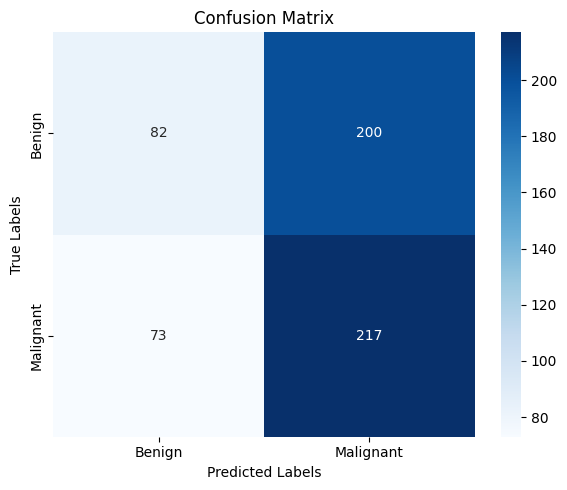

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the test set
Y_pred = model.predict(test_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_gen.classes

# Step 3: Class labels
class_labels = list(test_gen.class_indices.keys())

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
